In [ ]:
"""
Clean
Tokenize
Then remove stops 
Make bigrams
Make trigrams
THEN Lemmatize


"""

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
#import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'none','aƒ¼aƒ','aƒ³a'])

In [7]:
#possible lematizer
from textblob import TextBlob
import string
from nltk.tokenize import word_tokenize 

In [4]:
#possible lematizer
def lemmatize(fullCorpus):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized = fullCorpus['tokenized'].apply(
            lambda row: list(list(map(lemmatizer.lemmatize,y)) for y in row))
    return lemmatized

In [4]:
dfx=pd.read_csv("C:/Users/EybergA/Documents/Fsugg.csv")#wasdf

In [9]:
# Convert to list
#data = df.comment.values.tolist()#you have cleaned the original data below now follow all steps

#convert to list
data.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

#Remove less than 3
data = [re.sub(r'\b\w{1,3}\b', '', sent) for sent in data]

pprint(data[:1])

[' above']


In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['above']]


In [8]:
#test cleaning on dict

#Remove less than 3
#datx = [re.sub(r'\b\w{1,3}\b', '', sent) for sent in str(id2word)]

data=dfx['comment'].apply(lambda x: str(TextBlob(x).correct()))#yes if
#datx= for word in datx.apply(lambda x: str(TextBlob(x).correct()))
#data_words2 = list(sent_to_words(datx))
#datx=TextBlob(data_words).correct()

#newx=[]
#datax=[append(i) for i.correct() in data_words] 

#for word in data_words.correct()
 #   append

In [267]:
data

0                                                                                                 see above
1       Either include abstract and do's to non-subscribers or stop the table of contents alert being ro...
2                                                                          make journal search feature work
3                                                     Kindly aggregate books and journal based on specially
4                         open access policy for papers older than 2 years to get cited in following papers
                                                       ...                                                 
3001                                                                                                      j
3002    SOME JOURNALS LIKE BMJ,NEJM,CIRCULATION,JACC,AHJ,JOURNAL of CARDIOLOGY ARE NOT AVAILABLE.ALL BOO...
3003    when checking for compatibilities, the chart is in color, but I can't print in color, so the gra...
3004                        

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['above']


In [12]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
#how is this running if I don't have nlp
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = lemmatizer.lemmatize(" ".join(sent)) 
        texts_out.append([(sent for sent in doc)])
    return texts_out

In [14]:
#new lemmatizer#skip you have it working above
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [15]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

data_lemmatized = (data_words_bigrams)

print(data_lemmatized[:1])

[[]]


In [16]:
data_lemmatized

[[], ['either', 'include', 'abstract', 'subscribers', 'stop', 'table_contents', 'alert', 'routed', 'clinicalkey', 'send', 'sevier', 'journal', 'alert'], ['make', 'journal', 'search', 'feature', 'work'], ['kindly', 'aggregate', 'books', 'journal', 'based', 'specially'], ['open', 'access', 'policy', 'papers', 'older', 'years', 'cited', 'following', 'papers'], ['shorter', 'questionnaire'], ['expand', 'filter', 'date', 'ability', 'configure', 'time', 'interval', 'filter', 'gender'], ['excellent', 'site'], ['would', 'extremely', 'helpful', 'option', 'books', 'articles', 'chapters', 'personal', 'library', 'favorites', 'addition', 'possibility', 'footmarks', 'resume', 'read', 'ended', 'last', 'session'], ['please', 'provide', 'free', 'access', 'journals', 'text', 'books'], [], ['please', 'full_text', 'article', 'download'], ['spread', 'word'], ['please', 'please', 'please', 'situation', 'export', 'function', 'also', 'simplify', 'openathens', 'login', 'procedure', 'changed', 'recently', 'much'

In [78]:
#This is your lemmatizer, it was putting a space in for some reason...
# lemmatize # this is your lemmatizer if the compiler fails ONLY if it fails above
"""
texts_out=[]
lmtzr = WordNetLemmatizer()
tokens = [lmtzr.lemmatize(word) for word in str(data_words_bigrams)]
preprocessed_text= (''.join(tokens))

"""



In [182]:
pre2

<generator object sent_to_words at 0x168C2EB0>

In [111]:
data_ready=data_lemm

In [108]:

#Don't use unless compiler fails
#data_lemm= [d.split() for d in strs]

In [140]:
#It accepts this for some reason but not the other.Ok it needs strings around each of the quotes but not the lists itself
#Need to remove quotes and extra commas 
print(data_lemm)

[["'see'"], ["'either',", "'include',", "'abstracts',", "'dois',", "'non',", "'subscribers',", "'stop',", "'table',", "'contents',", "'alerts',", "'routed',", "'clinicalkey',", "'send',", "'elsevier',", "'journal',", "'alerts'"], ["'make',", "'journal',", "'search',", "'feature',", "'work'"], ["'kindly',", "'segregate',", "'books',", "'journal',", "'based',", "'speciality'"], ["'open',", "'access',", "'policy',", "'papers',", "'older',", "'years',", "'get',", "'cited',", "'following',", "'papers'"], ["'shorter',", "'questionnaire'"], ["'expand',", "'filter',", "'date',", "'ability',", "'configure',", "'time',", "'interval',", "'add',", "'filter',", "'gender',", "'age'"], ["'excellent',", "'site'"], ["'would',", "'extremely',", "'helpful',", "'option',", "'add',", "'books',", "'articles',", "'chapters',", "'personal',", "'library',", "'favorites',", "'addition',", "'posibility',", "'add',", "'bookmarks',", "'resume',", "'read',", "'ended',", "'last',", "'session'"], ["'please',", "'prov

In [98]:
"""
Not necessary unless the compiler fails
strs = preprocessed_text.replace('[','').split('],')#this one breaks the list of lists 
#listz = [map(int, s.replace(']','').split(',')) for s in strs]# not at all necessary
"""


In [138]:
"""
Not necessary unless the compiler fails
#data_le = str(data_lemm).replace('"', '')
data_le2=str(data_lemm).replace(',','')
print (data_le2)"""


[["'see'"] ["'either'" "'include'" "'abstracts'" "'dois'" "'non'" "'subscribers'" "'stop'" "'table'" "'contents'" "'alerts'" "'routed'" "'clinicalkey'" "'send'" "'elsevier'" "'journal'" "'alerts'"] ["'make'" "'journal'" "'search'" "'feature'" "'work'"] ["'kindly'" "'segregate'" "'books'" "'journal'" "'based'" "'speciality'"] ["'open'" "'access'" "'policy'" "'papers'" "'older'" "'years'" "'get'" "'cited'" "'following'" "'papers'"] ["'shorter'" "'questionnaire'"] ["'expand'" "'filter'" "'date'" "'ability'" "'configure'" "'time'" "'interval'" "'add'" "'filter'" "'gender'" "'age'"] ["'excellent'" "'site'"] ["'would'" "'extremely'" "'helpful'" "'option'" "'add'" "'books'" "'articles'" "'chapters'" "'personal'" "'library'" "'favorites'" "'addition'" "'posibility'" "'add'" "'bookmarks'" "'resume'" "'read'" "'ended'" "'last'" "'session'"] ["'please'" "'provide'" "'free'" "'access'" "'journals'" "'text'" "'books'"] [] ["'please'" "'get'" "'full_text'" "'article'" "'download'"] ["'spread'" "'wor

In [17]:
data_ready=data_lemmatized

In [20]:
print("The dictionary has: " +str(len(id2word)) + " tokens")#much better after cleaning

for k, v in id2word.token2id.items():
    print(f'{k:{15}} {v:{10}}')

The dictionary has: 4096 tokens
abstract                 0
alert                    1
clinicalkey              2
either                   3
include                  4
journal                  5
routed                   6
send                     7
sevier                   8
stop                     9
subscribers             10
table_contents          11
feature                 12
make                    13
search                  14
work                    15
aggregate               16
based                   17
books                   18
kindly                  19
specially               20
access                  21
cited                   22
following               23
older                   24
open                    25
papers                  26
policy                  27
years                   28
questionnaire           29
shorter                 30
ability                 31
configure               32
date                    33
expand                  34
filter                 

In [154]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=26, 
                                           random_state=100,
                                           update_every=5,
                                           chunksize=10,
                                           passes=100,
                                           alpha='asymmetric',
                                           eta= 'auto', 
                                           iterations=1500,
                                           per_word_topics=True)

#symmetric

In [104]:
pprint(lda_model.show_topics(formatted=False))

[(25,
  [('books', 0.3058761),
   ('option', 0.18177576),
   ('specific', 0.118947454),
   ('clinics', 0.015262435),
   ('together', 0.012442633),
   ('group', 0.005416719),
   ('neonatology', 0.004062952),
   ('available', 8.711636e-05),
   ('related', 8.711601e-05),
   ('nejm', 8.7116e-05)]),
 (24,
  [('acid', 0.0002441406),
   ('nutrition', 0.0002441406),
   ('failure', 0.0002441406),
   ('disorders', 0.0002441406),
   ('detail', 0.0002441406),
   ('compensated', 0.0002441406),
   ('chronic', 0.0002441406),
   ('renal', 0.0002441406),
   ('smart', 0.0002441406),
   ('hardcopy', 0.0002441406)]),
 (23,
  [('like', 0.2536973),
   ('would', 0.22071126),
   ('page', 0.19283895),
   ('open', 0.06053003),
   ('print', 6.652639e-05),
   ('color', 6.652601e-05),
   ('sign', 6.652601e-05),
   ('triangle', 6.6525994e-05),
   ('circle', 6.6525994e-05),
   ('need', 6.652596e-05)]),
 (22,
  [('site', 0.37257636),
   ('access', 0.25051567),
   ('time', 0.19464827),
   ('drop', 0.007268383),
   ('c

In [107]:
#print topics to csv without mallet first
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 26)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_No_M.csv")

In [108]:
# Compute Perplexity -need to adjust #before mallet
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -24.400636129887832

Coherence Score:  0.41079647455367163


In [109]:
# Visualize the topics #before mallet #oh yea it fails >9
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
0     -0.270058+0.000000j  0.262591+0.000000j       1        1  11.581610
12    -0.160673+0.000000j  0.074389+0.000000j       2        1   9.858819
22    -0.272536+0.000000j -0.303608+0.000000j       3        1   8.567236
7     -0.023402+0.000000j  0.002430+0.000000j       4        1   5.615292
1      0.028372+0.000000j -0.004347+0.000000j       5        1   5.456863
10    -0.062939+0.000000j -0.012328+0.000000j       6        1   5.340839
23    -0.036228+0.000000j  0.008935+0.000000j       7        1   4.854487
9      0.017776+0.000000j -0.005369+0.000000j       8        1   4.704108
11     0.003594+0.000000j -0.006638+0.000000j       9        1   4.484078
5      0.015124+0.000000j -0.005825+0.000000j      10        1   4.233890
20     0.009564+0.000000j -0.005815+0.000000j      11        1   4.233483
15     

In [125]:
# Visualize the topics
mmodel = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(mmodel, corpus, id2word)
vis


c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  r

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.013895  0.074096       1        1  4.231876
12     0.003940  0.095150       2        1  4.040960
0     -0.019058  0.138854       3        1  3.983658
25     0.053698  0.028727       4        1  3.978575
3     -0.015194  0.005944       5        1  3.951030
6     -0.047586  0.058910       6        1  3.936703
2      0.047727  0.001719       7        1  3.913037
16     0.032675  0.002955       8        1  3.893112
8      0.141907 -0.252050       9        1  3.884362
24     0.049963  0.152673      10        1  3.873905
14     0.017257 -0.062490      11        1  3.859945
13     0.059855 -0.144600      12        1  3.827582
23     0.110628 -0.163501      13        1  3.826716
21     0.037185  0.027672      14        1  3.810669
17    -0.000426  0.051640      15        1  3.810328
20     0.157547 -0.228969      16        1  3.777918
19    -0.315020 -0.122766      17        1  3.771189
15    -0.235760 -0.025398      18        1  3.768959
4      0.039259  0.081842      19        1  3.756720
9      0.010148  0.051925      20        1  3.751036
5     -0.081100 -0.001087      21        1  3.745824
18     0.057715  0.108872      22        1  3.742483
10     0.012706 -0.014447      23        1  3.730689
11     0.065547  0.136122      24        1  3.723303
7     -0.270843 -0.087341      25        1  3.708498
22     0.073336  0.085546      26        1  3.700923, topic_info=     Category        Freq        Term       Total  loglift  logprob
40    Default  441.000000        site  441.000000  30.0000  30.0000
14    Default  316.000000      search  316.000000  29.0000  29.0000
21    Default  330.000000      access  330.000000  28.0000  28.0000
42    Default  197.000000    articles  197.000000  27.0000  27.0000
38    Default  221.000000        time  221.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
917   Topic26    4.897208  specialise    8.471946   2.7485  -5.0189
289   Topic26    6.121510     suggest   24.575283   1.9067  -4.7958
346   Topic26    4.897208   resources   23.553962   1.7260  -5.0189
95    Topic26    3.672906      tables    7.650745   2.5628  -5.3066
2312  Topic26    3.672906      fields    7.095278   2.6381  -5.3066

[1795 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
31       21  0.020465     ability
31       22  0.941392     ability
31       24  0.020465     ability
224      13  1.056738  absolutely
0         1  0.999566    abstract
...     ...       ...         ...
1797     16  0.998529       youre
2293     10  0.825462    zimbabwe
2303     12  0.806733        æsze
1975     17  0.821447        æzœa
2130     20  0.801884        æœye

[2151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 13, 1, 26, 4, 7, 3, 17, 9, 25, 15, 14, 24, 22, 18, 21, 20, 16, 5, 10, 6, 19, 11, 12, 8, 23])

In [64]:
pyLDAvis.save_html(vis, 'ForeseSuggestionsModel4.html')

In [ ]:
#example only
import os

os.environ.update({'MALLET_HOME': r'/home/jupyter/new_mallet/mallet-2.0.8/'})

mallet_path = "\\home\\jupyter\\new_mallet\\mallet-2.0.8\\bin\\mallet" # update this path
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word)


In [110]:
#Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip #it's in the path now, so you should just be able to run this 
mallet_path = "C:\\mallet-2.0.8\\bin\\mallet.bat" # update this path #12_15 it's looking at this but looking for the zip#This path is correct
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=26, id2word=id2word)


In [111]:
#mallet coherence nope
# Compute Perplexity -need to adjust #before mallet
print('\nPerplexity: ', ldamallet.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

AttributeError: 'LdaMallet' object has no attribute 'log_perplexity'

In [112]:
# Show Topics#for suggestions 20 is correct#trying 26
pprint(ldamallet.show_topics(26,formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('option', 0.10091743119266056),
   ('specific', 0.08868501529051988),
   ('found', 0.05963302752293578),
   ('find', 0.05963302752293578),
   ('helpful', 0.05504587155963303),
   ('nice', 0.047400611620795105),
   ('section', 0.0382262996941896),
   ('quickly', 0.024464831804281346),
   ('wanted', 0.024464831804281346),
   ('source', 0.013761467889908258)]),
 (1,
  [('article', 0.19009370816599733),
   ('link', 0.07362784471218206),
   ('clinicalkey', 0.0642570281124498),
   ('full', 0.058902275769745646),
   ('today', 0.04417670682730924),
   ('links', 0.0321285140562249),
   ('sevier', 0.030789825970548863),
   ('title', 0.029451137884872823),
   ('directly', 0.02677376171352075),
   ('abstract', 0.020080321285140562)]),
 (2,
  [('webster', 0.08964451313755796),
   ('suggestions', 0.0633693972179289),
   ('excellent', 0.0633693972179289),
   ('read', 0.0633693972179289),
   ('experience', 0.02627511591962906),
   ('user', 0.02627511591962906),
   ('screen', 0.023183925811437

In [137]:
#print topics to csv
top_words_per_topic = []
for t in range(ldamallet.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in ldamallet.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("Mallet26_topics2.csv")

In [ ]:
#print top words to csv


In [50]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = "C:/mallet-2.0.8"

#mallet_path = "C:\\mallet-2.0.8\\bin\\mallet.bat"


In [44]:
os.environ.update({'C:/USERS/EYBERGA/DOWNLOADS/MALLET-2.0.8.ZIP':r"C:/mallet-2.0.8"})

In [114]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [115]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=60, step=6)

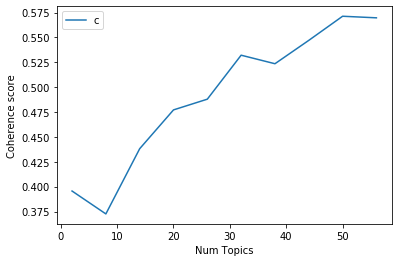

In [116]:
# Show graph
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [117]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3956
Num Topics = 8  has Coherence Value of 0.3726
Num Topics = 14  has Coherence Value of 0.4381
Num Topics = 20  has Coherence Value of 0.4772
Num Topics = 26  has Coherence Value of 0.488
Num Topics = 32  has Coherence Value of 0.5322
Num Topics = 38  has Coherence Value of 0.5236
Num Topics = 44  has Coherence Value of 0.5471
Num Topics = 50  has Coherence Value of 0.5713
Num Topics = 56  has Coherence Value of 0.5698


In [126]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#change model here
df_topic_sents_keywords = format_topics_sentences(ldamodel=mmodel, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(27)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0385,"option, specific, found, find, helpful, nice, section, quickly, wanted, source",[]
1,1,1.0,0.1439,"article, link, clinicalkey, full, today, links, sevier, title, directly, abstract","[either, include, abstract, subscribers, stop, table_contents, alert, routed, clinicalkey, send,..."
2,2,9.0,0.0531,"make, easier, review, people, sources, made, longed, provided, knowledge, round","[make, journal, search, feature, work]"
3,3,22.0,0.0859,"journals, list, specially, students, field, date, related, contents, surgery, multiple","[kindly, aggregate, books, journal, based, specially]"
4,4,13.0,0.0839,"access, problem, texts, university, order, subscription, major, institutional, papers, team","[open, access, policy, papers, older, years, cited, following, papers]"
5,5,19.0,0.0562,"site, visit, library, test, satisfied, create, archives, pain, late, functions","[shorter, questionnaire]"
6,6,11.0,0.0791,"reference, medicine, drug, faster, perfect, filter, process, practice, improved, great","[expand, filter, date, ability, configure, time, interval, filter, gender]"
7,7,2.0,0.0541,"webster, suggestions, excellent, read, experience, user, screen, words, annoying, actual","[excellent, site]"
8,8,16.0,0.0746,"books, book, text, format, chapters, layout, images, reading, system, clinically","[would, extremely, helpful, option, books, articles, chapters, personal, library, favorites, add..."
9,9,4.0,0.0699,"articles, full_text, provide, free, research, resources, love, similar, feedback, latest","[please, provide, free, access, journals, text, books]"


In [127]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(26)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.1850,"option, specific, found, find, helpful, nice, section, quickly, wanted, source","[since, changed, format, found, product, mediocre, best, takes, forever, load, getting, specific..."
1,1.0,0.3065,"article, link, clinicalkey, full, today, links, sevier, title, directly, abstract","[provide, linking, rubbed, direct, clinicalkey, maybe, separate, different, sevier, linkout, ico..."
2,2.0,0.3111,"webster, suggestions, excellent, read, experience, user, screen, words, annoying, actual","[please, sticky, header, tortuous, webster, even, brother, full, screen, view, actual, informati..."
3,3.0,0.2704,"medical, textbook, difficult, navigable, resource, relevant, makes, online, happy, authors","[limiting, downloading, medical, texts, specifically, offensive, outside, academic, access, reso..."
4,4.0,0.1481,"articles, full_text, provide, free, research, resources, love, similar, feedback, latest","[aƒˆaƒƒaƒ, aƒsaƒ¼a, aƒ³a, aƒ¼a, pubmeda, aƒ³a, aƒ¼a, aƒ¼a, aƒ¼a, yeƒ½a]"
5,5.0,0.1739,"include, navigation, current, user_friendly, side, stroll, home, sections, recent, suggestion","[improve, page, load, times, please, include, issn, journal, journal, home, page, please, stop, ..."
6,6.0,0.2054,"journal, page, issue, pages, year, number, issues, sites, paper, publication","[would, hope, able, click, journal, title, find, article, would, like, searching, year, page, nu..."
7,7.0,0.1419,"good, work, dont, site, deep, service, continue, choice, reason, didnt","[question, clinically, tormented, target, particular, patient, retired, head, public, health, se..."
8,8.0,0.3639,"time, improve, times, topic, computer, speed, select, slow, mobile, limited","[great, trouble, firing, potential, credit, claimed, credit, introspect, think, perhaps, compute..."
9,9.0,0.1041,"make, easier, review, people, sources, made, longed, provided, knowledge, round","[interested, give, peter, incredibly, helpful, made, initially, frustration, experience, much, e..."


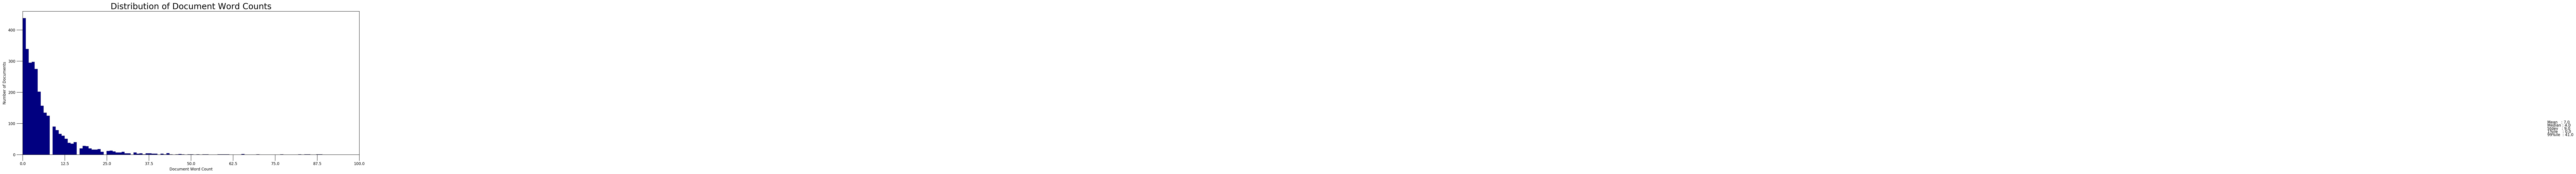

In [128]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

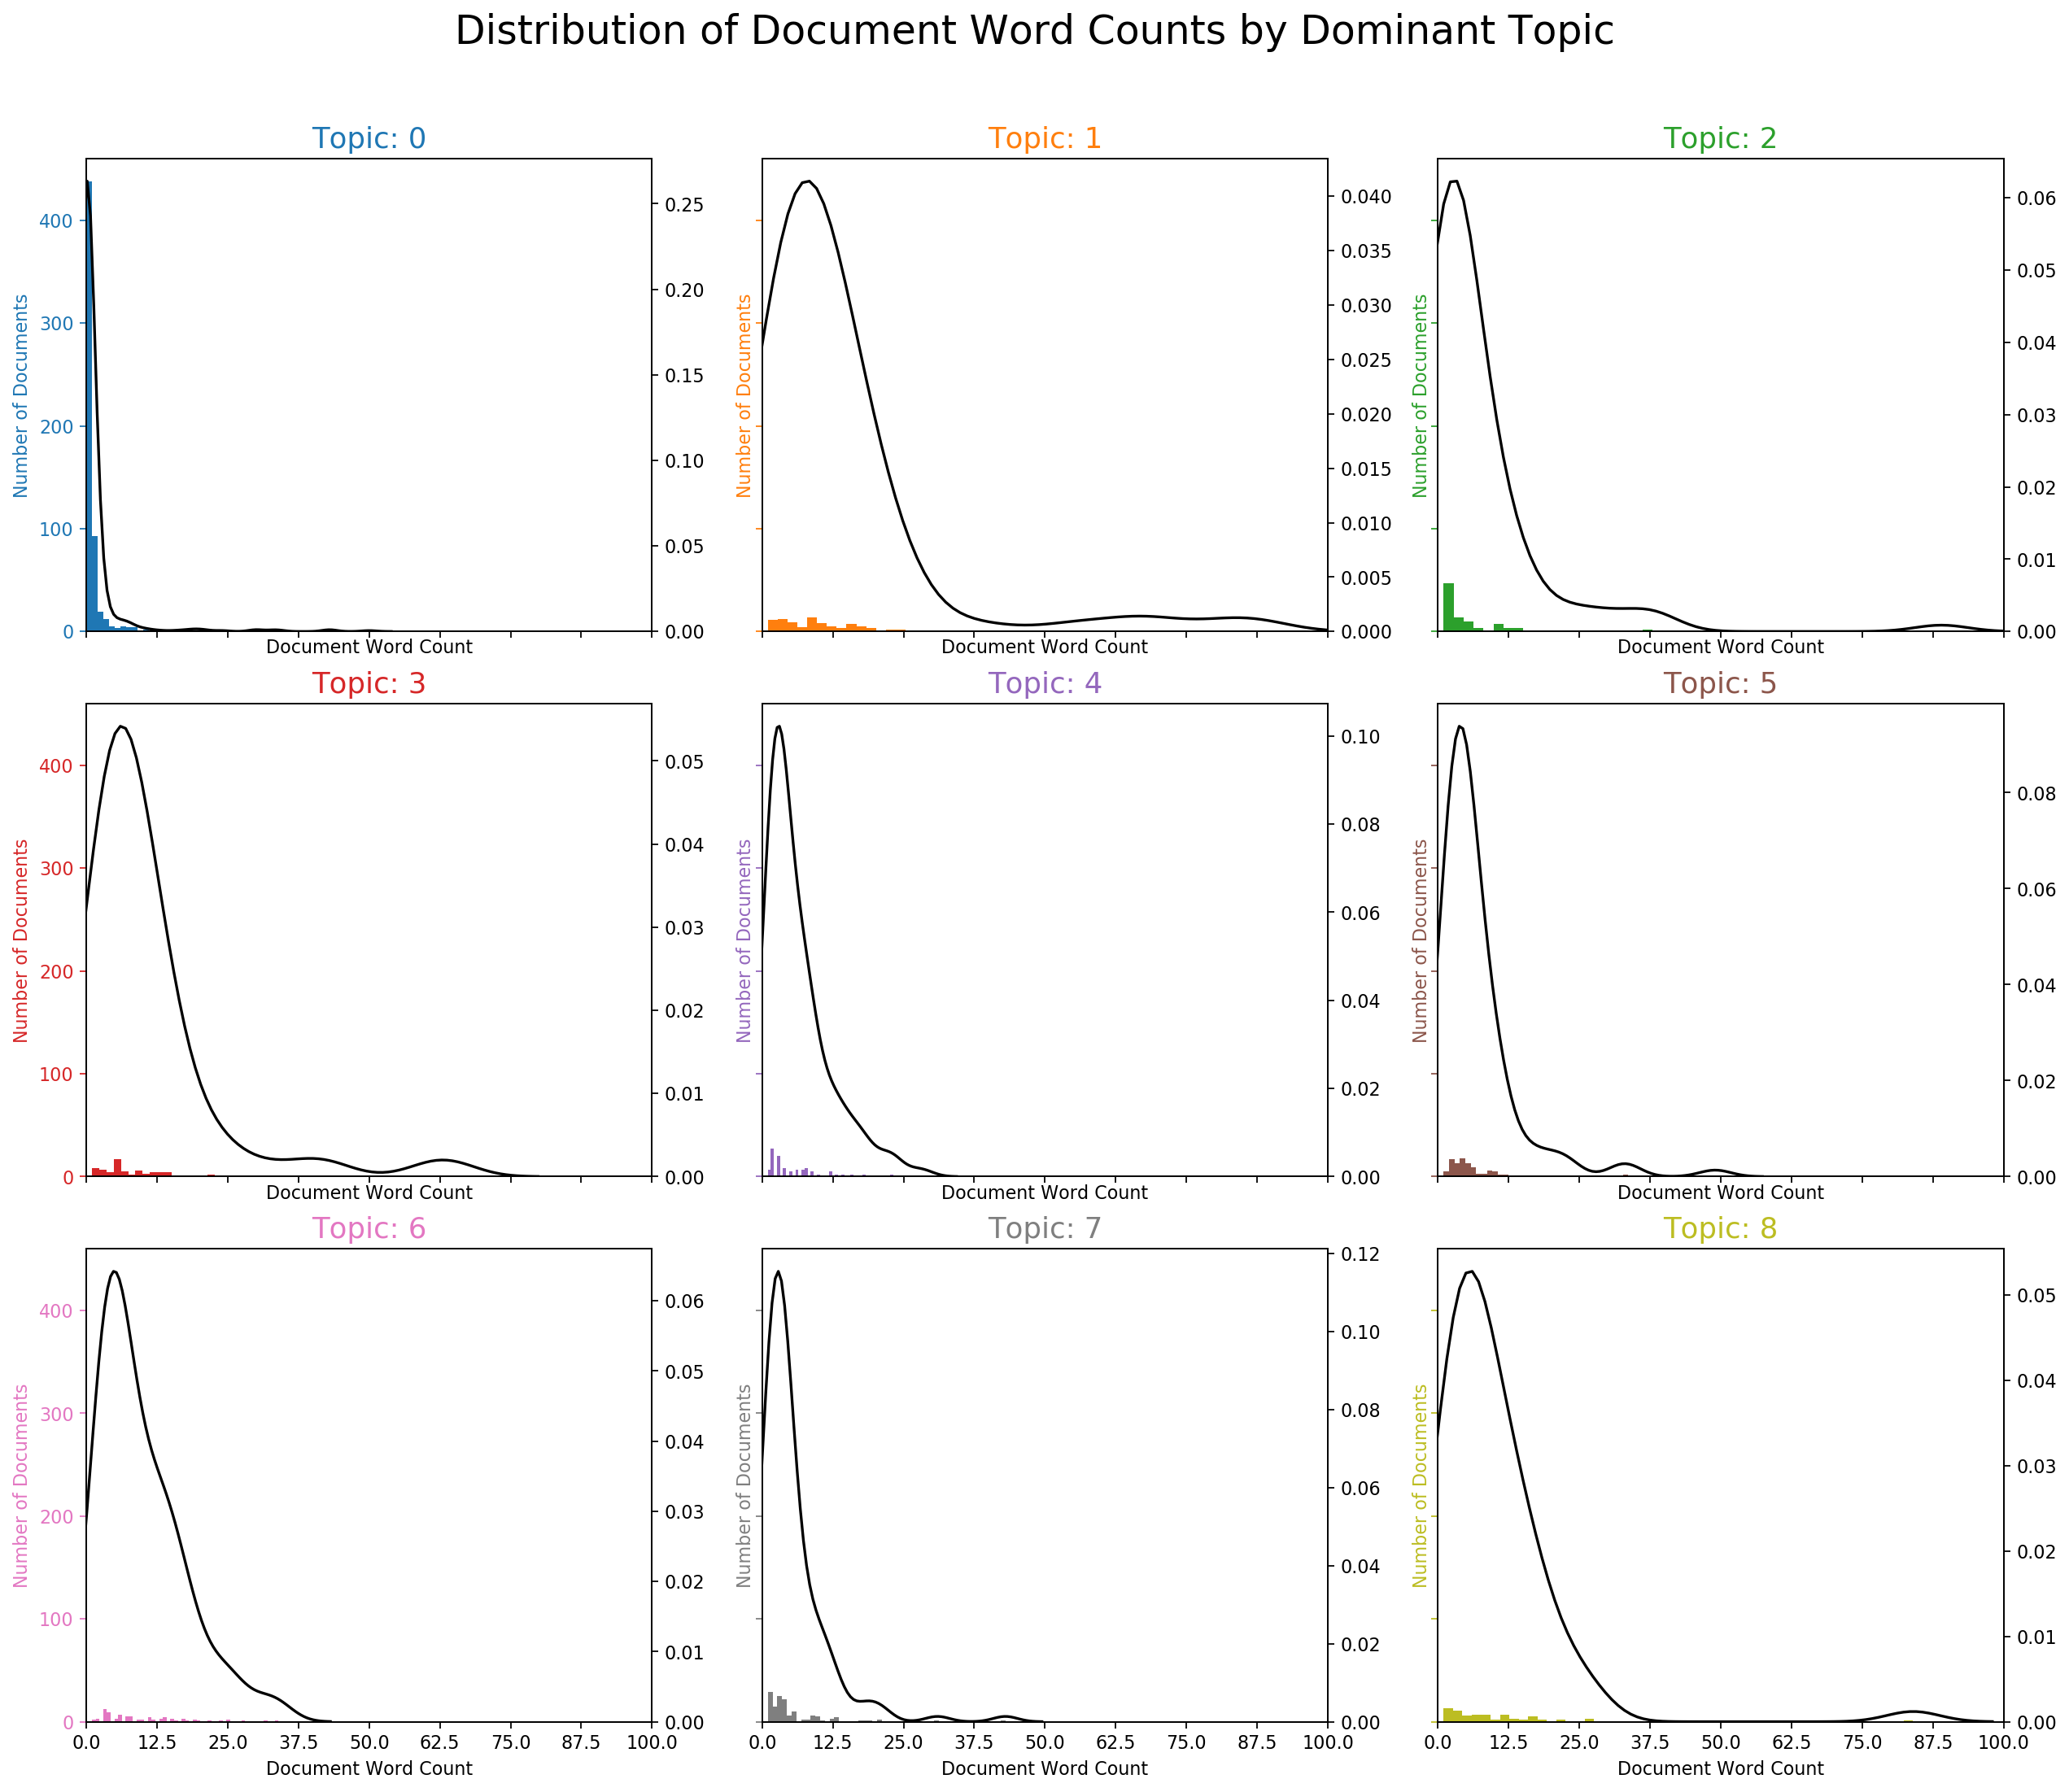

In [129]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  #more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3, 3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 50, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()



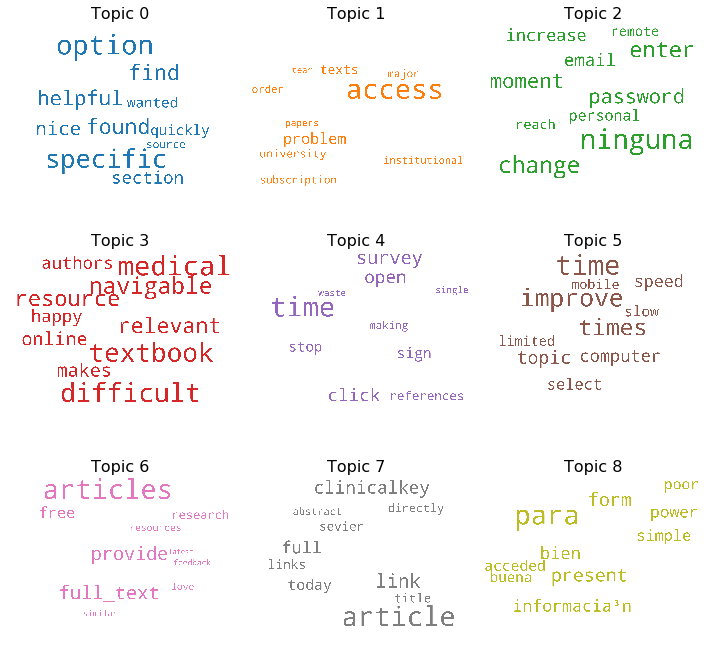

In [134]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=12,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = mmodel.show_topics(formatted=False)#change model here

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('OEwordcloud.png')#saving
plt.show()

IndexError: list index out of range

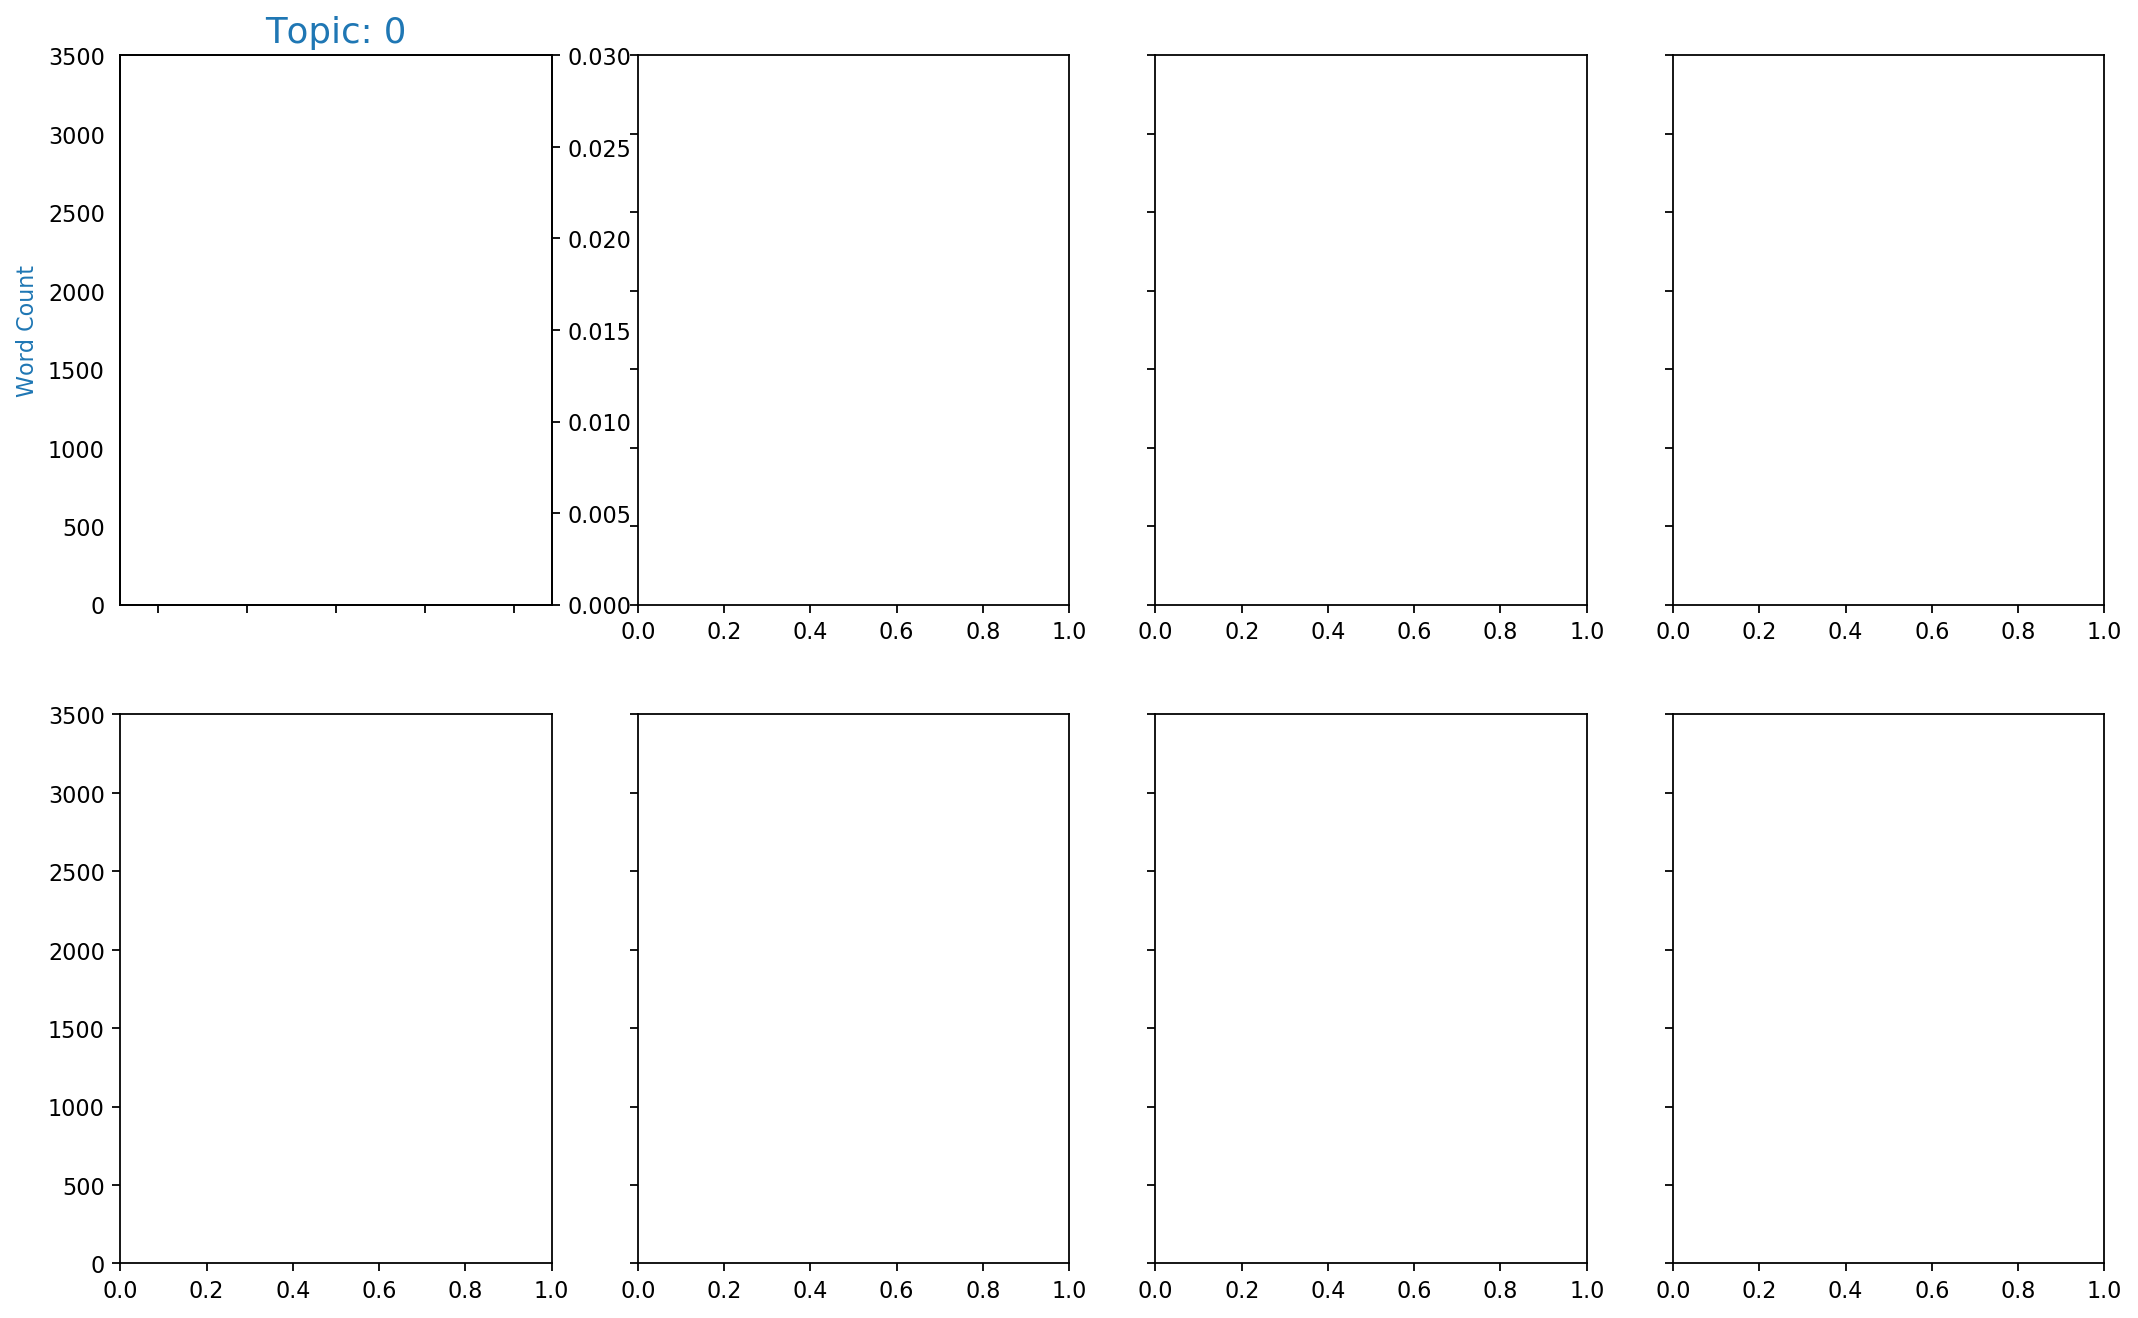

In [142]:
from collections import Counter
topics = ldamallet.show_topics(formatted=False)#change
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 4, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

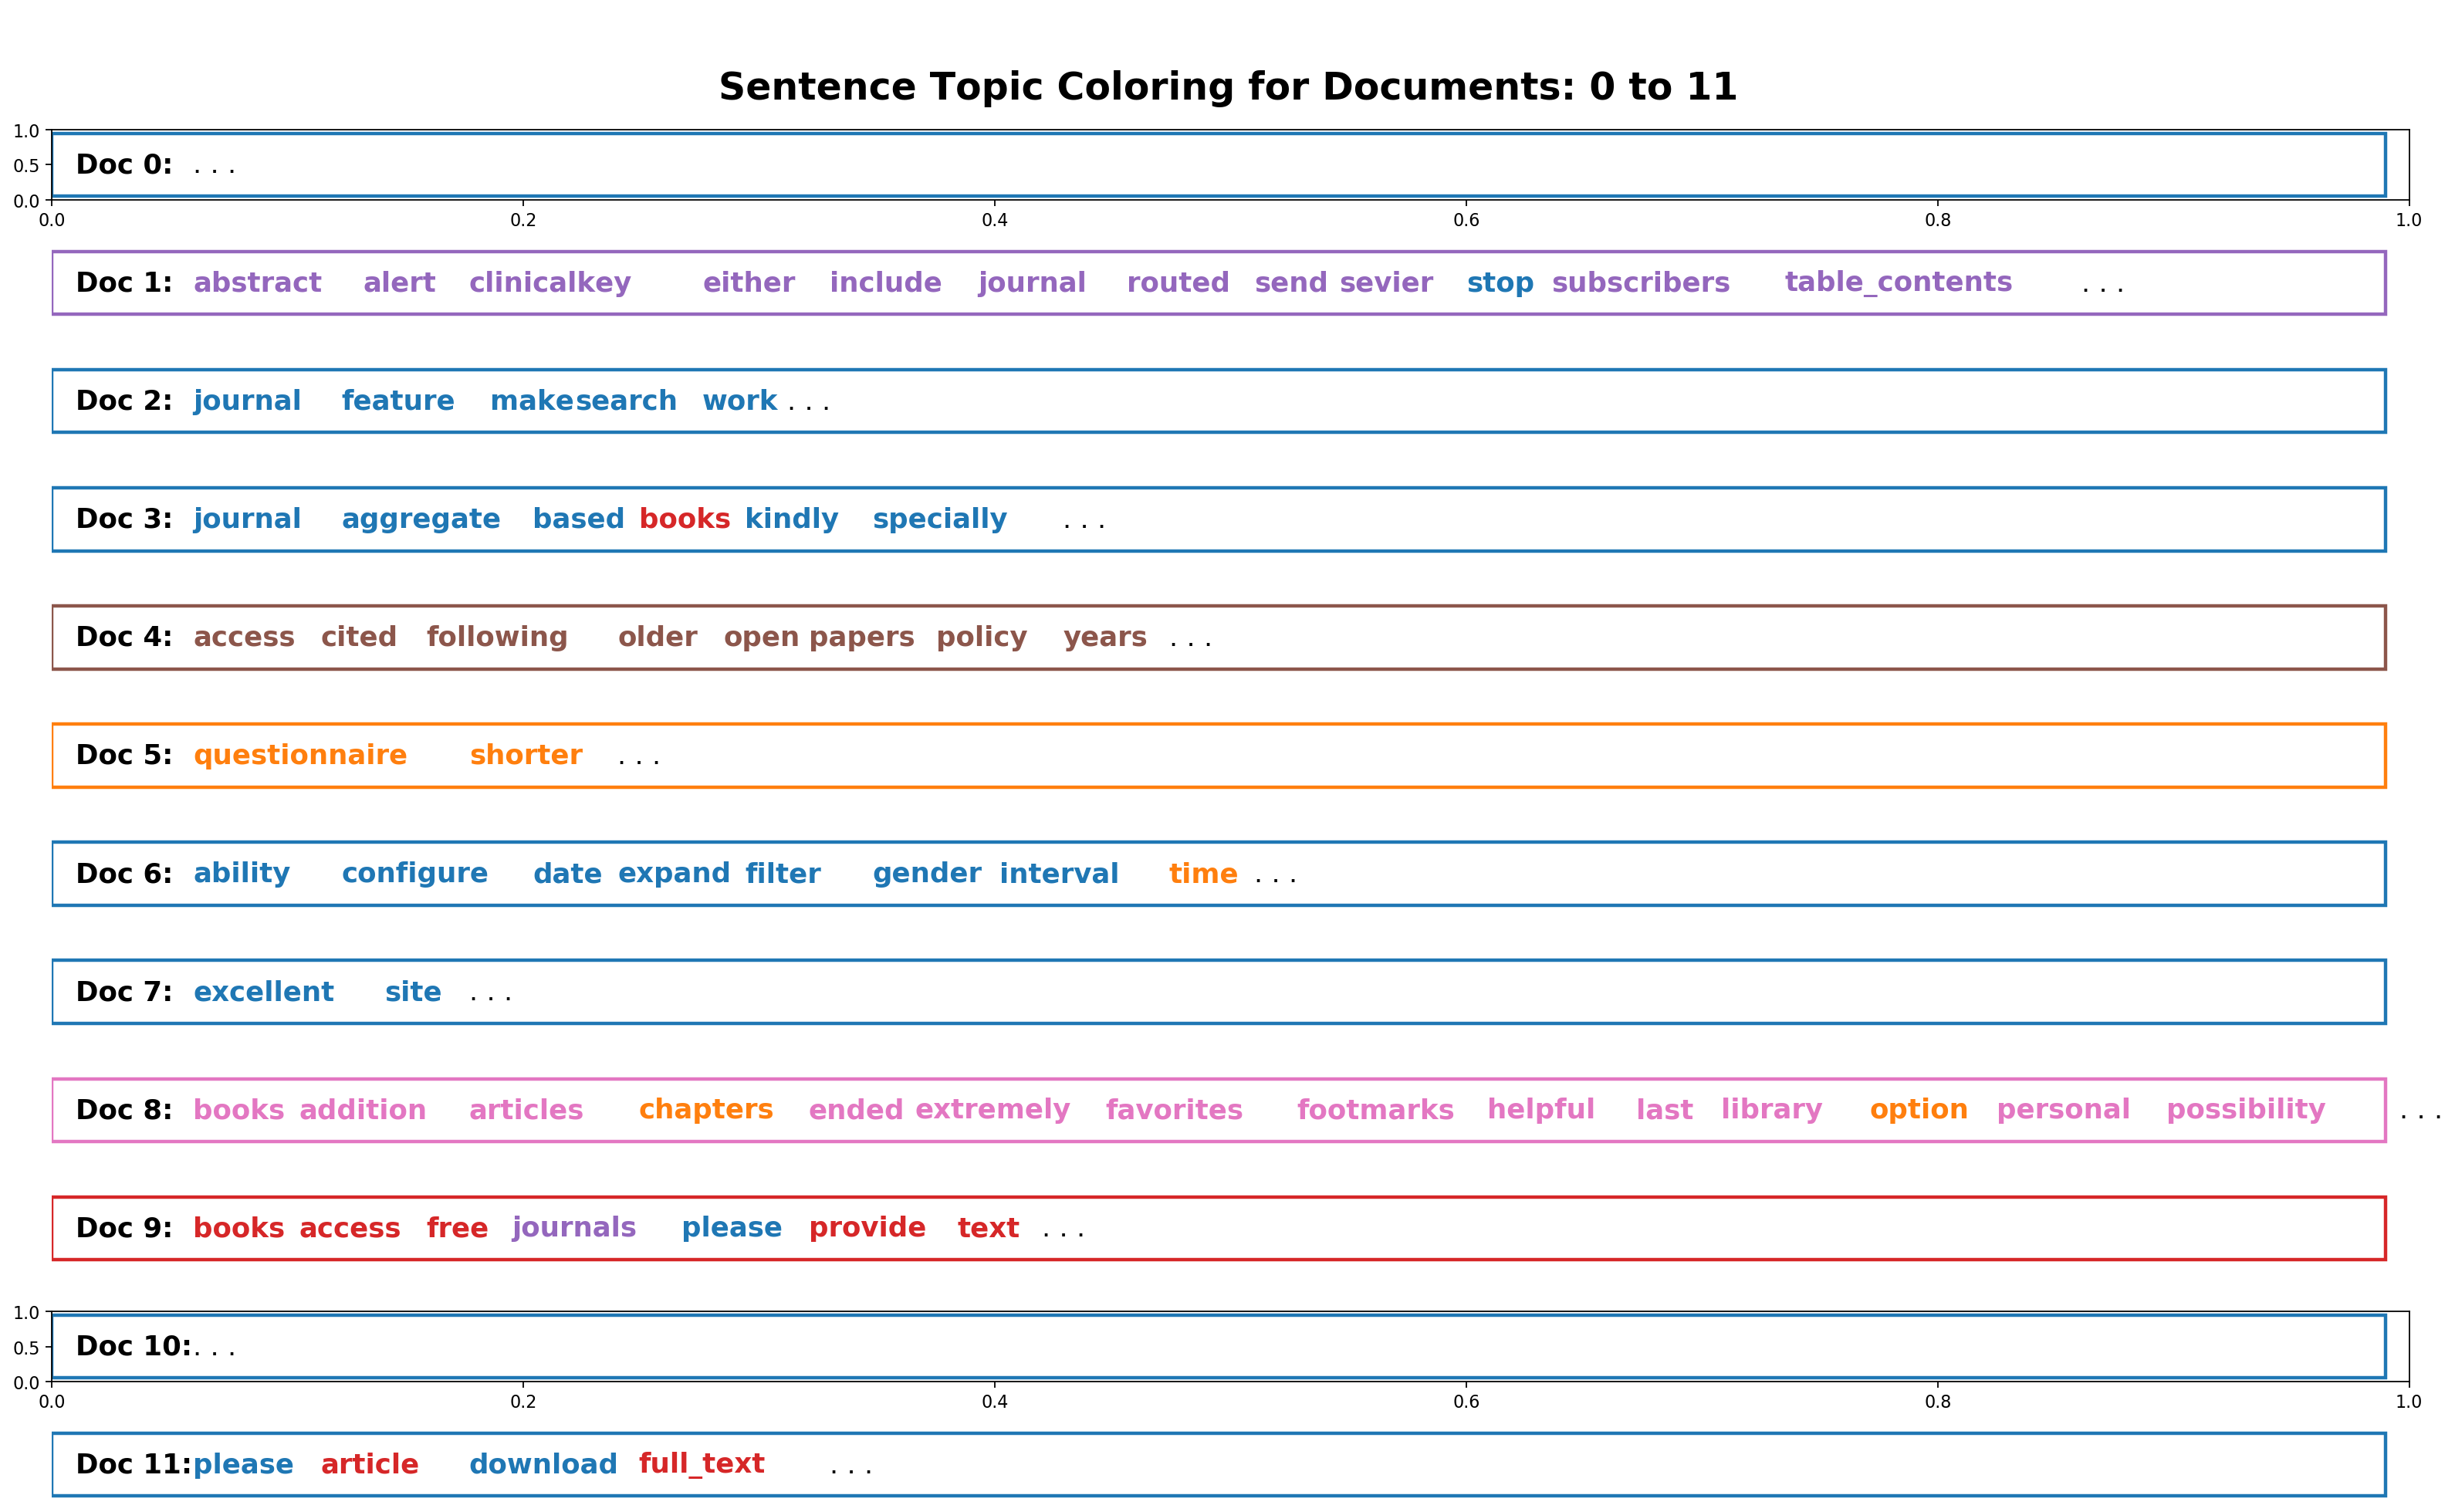

In [89]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [158]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [159]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1200x480 with 2 Axes>

In [143]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(mmodel, corpus, dictionary=lda_model.id2word)
vis

c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
c:\users\eyberga\appdata\local\programs\python\python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  r

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.013895  0.074096       1        1  4.231888
12     0.003940  0.095150       2        1  4.040961
0     -0.019058  0.138854       3        1  3.983671
25     0.053698  0.028727       4        1  3.978572
3     -0.015194  0.005944       5        1  3.951018
6     -0.047586  0.058910       6        1  3.936701
2      0.047727  0.001719       7        1  3.913052
16     0.032675  0.002955       8        1  3.893101
8      0.141907 -0.252050       9        1  3.884359
24     0.049963  0.152673      10        1  3.873910
14     0.017257 -0.062490      11        1  3.859915
13     0.059855 -0.144600      12        1  3.827584
23     0.110628 -0.163501      13        1  3.826720
21     0.037185  0.027672      14        1  3.810661
17    -0.000426  0.051640      15        1  3.810331
20     0.157547 -0.228969      16        1  3.777917
19    -0.315020 -0.122766      17        1  3.771212
15    -0.235760 -0.025398      18        1  3.768928
4      0.039259  0.081842      19        1  3.756713
9      0.010148  0.051925      20        1  3.751047
5     -0.081100 -0.001087      21        1  3.745840
18     0.057715  0.108872      22        1  3.742491
10     0.012706 -0.014447      23        1  3.730698
11     0.065547  0.136122      24        1  3.723280
7     -0.270843 -0.087341      25        1  3.708489
22     0.073336  0.085546      26        1  3.700942, topic_info=     Category        Freq        Term       Total  loglift  logprob
40    Default  441.000000        site  441.000000  30.0000  30.0000
14    Default  316.000000      search  316.000000  29.0000  29.0000
21    Default  330.000000      access  330.000000  28.0000  28.0000
42    Default  197.000000    articles  197.000000  27.0000  27.0000
38    Default  221.000000        time  221.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
917   Topic26    4.897234  specialise    8.471950   2.7485  -5.0189
289   Topic26    6.121542     suggest   24.575369   1.9067  -4.7958
346   Topic26    4.897234   resources   23.553971   1.7260  -5.0189
95    Topic26    3.672925      tables    7.650740   2.5628  -5.3066
2312  Topic26    3.672925      fields    7.095296   2.6381  -5.3066

[1798 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
31       21  0.020465     ability
31       22  0.941390     ability
31       24  0.020465     ability
224      13  1.056737  absolutely
0         1  0.999563    abstract
...     ...       ...         ...
1797     16  0.998529       youre
2293     10  0.825461    zimbabwe
2303     12  0.806733        æsze
1975     17  0.821442        æzœa
2130     20  0.801881        æœye

[2154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 13, 1, 26, 4, 7, 3, 17, 9, 25, 15, 14, 24, 22, 18, 21, 20, 16, 5, 10, 6, 19, 11, 12, 8, 23])

In [160]:
pyLDAvis.save_html(vis, 'ForeseSuggestions_Malletf.html')

In [156]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []#change
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
#arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 20
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])#original was 0 and 1
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3006 samples in 0.006s...
[t-SNE] Computed neighbors for 3006 samples in 0.348s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3006
[t-SNE] Computed conditional probabilities for sample 2000 / 3006
[t-SNE] Computed conditional probabilities for sample 3000 / 3006
[t-SNE] Computed conditional probabilities for sample 3006 / 3006
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.665245
[t-SNE] KL divergence after 1000 iterations: 0.605030


Loading BokehJS ...

IndexError: index 13 is out of bounds for axis 0 with size 10